
## Project: Investigate a Dataset (TMDb_Movies Dataset)
Table of Contents

   1) Introduction
   
   2) Data Wrangling
   
   3) Exploratory Data Analysis
   
   4) Conclusions



<a id='intro'></a>
## Introduction

 ## Overview

To complete my Data Analysis project I choose TMDb movies dataset.

This data set contains information about 10000 movies collected from The Movie Database (TMDb), including user ratings,popularity and revenue. It consist of 21 columns such as imdb_id, cast, budget, vote_count,runtime etc.It also have a lot of information because it has 10866 rows so my analysis will be base on a supset of data that contains the needed data points for that study.  
Question that can analyised from this data set

  1) What is the net profit per movie ?.
  
  2) Which year has the most gained profit?.
  
  3) Which movie has the highest gained revenue ?.
  
  4) Which movie has the lowest revenue ?.
  
  5) Most frequent actors
  
  6) Top 5 movies that have the highest revenues.
  
  7) Which geners are associated with the highest profits?.
  
  8) Most frequent movies.
  
  9) Which geners are popular?.
  
  10) Average runtime of all the movies and does time has an effect on the revenue?.

  
  

  

    
  
  
  

In [26]:
#import important libraries that will help me with my analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section after observing TMDb movie data , i will start to clean it to make the data easy to read and to understand the calculation.
### General Properties

In [27]:
# first i need to look at TMDb data 
#loading csv file and storing it as df
df=pd.read_csv('TMDb_movie.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [28]:
#here i want to know the numbers of columns and rows
df.shape

(10866, 21)

## Data Cleaning  
1) Removing the columns that won't be useful in my analysis.

2) There are numbers of movies in the database have zero budget or zero revenue,we will discard these movies because they won't be useful.

3) Finding datas that Nan value and then remove them.

4) Removing the duplicacy in the rows(if any).

5) Convert different data types into the same type such as "converting floats to integers".

6) Changing release date column into date format.

7) Changing format of genres and cast in order to use the in comparison with numerical data.




 

In [29]:
# dropping columns that i won't use for.
#columns that i want to delete are 'id','imdb_id','homepage','tagline','production_companies','keywords','director','overview','vote_count','vote_average'
df.drop(['id','imdb_id','homepage','tagline','production_companies','keywords','director','overview','vote_count','vote_average'],axis= 1, inplace=True)

In [30]:
# to confirm that the columns have been deleted
df.head(1)

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015,137999939.3,1.392446e+09


In [31]:
#here i want to see some statistics to help me in my analysis
df.describe()

,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


In [32]:
## my observation from the step above that i need to drop budgrt_adj and revenue_adj columns because there datas are similar to budget and revenue columns
df.drop(['budget_adj','revenue_adj'],axis=1,inplace=True)
df.head(1)

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015


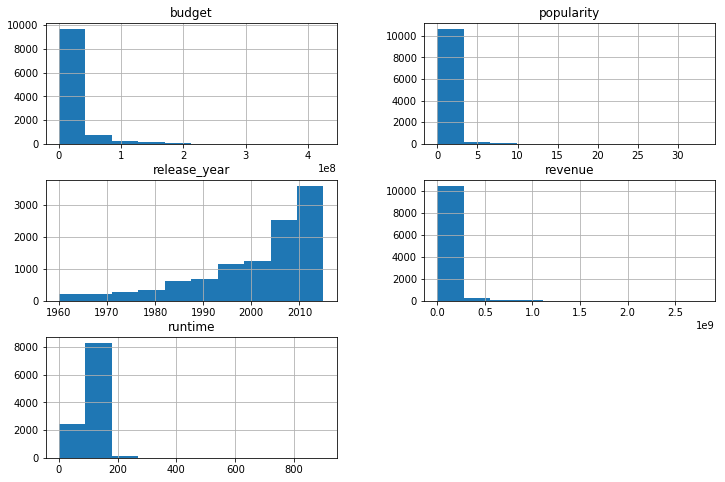

In [33]:
# let us visualize our data after we cleaned it.
df.hist(figsize=(12,8));

In [34]:
#to know the types of our data in order to see if we need further cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 764.1+ KB


In [35]:
#There are numbers of movies in the database have zero budget or zero revenue,we will discard these movies because they won't be useful.
money=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the money
df[money] = df[money].replace(0, np.NAN)

#Removing all the row which has NaN value in money 
df.dropna(subset = money, inplace = True)

rows, col = df.shape
print(' removing these values, we now have only {} no.of movies.'.format(rows-1))

 removing these values, we now have only 3854 no.of movies.


In [36]:
#here we need to find the unuseful values like Nan.
df[df.cast.isnull()]


,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
4127,0.193929,3000000.0,13308.0,Naqoyqatsi,NaN,89,Documentary|Drama|Music|Thriller,9/2/2002,2002
4889,0.075043,2500000.0,33400000.0,2016: Obama's America,NaN,87,Documentary,7/13/2012,2012
7813,0.065543,6000.0,6000.0,Loose Change: Final Cut,NaN,129,Documentary,11/11/2007,2007
9564,0.168545,2500000.0,589244.0,Powaqqatsi,NaN,99,Documentary|Drama|Music,4/29/1988,1988


In [37]:
#then we drop these values.
df.dropna(inplace=True)

In [38]:
#to confirm the step above we need to see information of data 
df.info()
#as we can see there are no Nan values but we still need to make our data types the same.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 9 columns):
popularity        3851 non-null float64
budget            3851 non-null float64
revenue           3851 non-null float64
original_title    3851 non-null object
cast              3851 non-null object
runtime           3851 non-null int64
genres            3851 non-null object
release_date      3851 non-null object
release_year      3851 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 300.9+ KB


In [39]:
#here we convert  the data type from float to integer
df['popularity']=df['popularity'].astype(int)
df['budget']=df['budget'].astype(int)
df['revenue']=df['revenue'].astype(int)

In [40]:
#Changing release date column into date format.
df['release_date']=pd.to_datetime(df['release_date'])
df.head(1)

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [41]:
#To confirm the step above.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 9 columns):
popularity        3851 non-null int64
budget            3851 non-null int64
revenue           3851 non-null int64
original_title    3851 non-null object
cast              3851 non-null object
runtime           3851 non-null int64
genres            3851 non-null object
release_date      3851 non-null datetime64[ns]
release_year      3851 non-null int64
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 300.9+ KB


In [42]:
#Removing the duplicacy in the rows(if any).
df.duplicated().sum()

1

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.duplicated().sum()

0

In [45]:
#change format of genres and cast in order to use the in comparison with numerical data.
Geners=df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
actors=df['cast'] = df['cast'].apply(lambda x: x.split('|')[0])

In [46]:
df.head(1)

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,32,150000000,1513528810,Jurassic World,Chris Pratt,124,Action,2015-06-09,2015


<a id='eda'></a>
## Exploratory Data Analysis

>
### Q1.What is the net profit per movie ?

In [47]:
df.insert(3,'gained_profit',df['revenue']-df['budget'])
df.head(50)

,popularity,budget,revenue,gained_profit,original_title,cast,runtime,genres,release_date,release_year
0,32,150000000,1513528810,1363528810,Jurassic World,Chris Pratt,124,Action,2015-06-09,2015
1,28,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy,120,Action,2015-05-13,2015
2,13,110000000,295238201,185238201,Insurgent,Shailene Woodley,119,Adventure,2015-03-18,2015
3,11,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford,136,Action,2015-12-15,2015
4,9,190000000,1506249360,1316249360,Furious 7,Vin Diesel,137,Action,2015-04-01,2015
5,9,135000000,532950503,397950503,The Revenant,Leonardo DiCaprio,156,Western,2015-12-25,2015
6,8,155000000,440603537,285603537,Terminator Genisys,Arnold Schwarzenegger,125,Science Fiction,2015-06-23,2015
7,7,108000000,595380321,487380321,The Martian,Matt Damon,141,Drama,2015-09-30,2015
8,7,74000000,1156730962,1082730962,Minions,Sandra Bullock,91,Family,2015-06-17,2015
9,6,175000000,853708609,678708609,Inside Out,Amy Poehler,94,Comedy,2015-06-09,2015


In [48]:
df.describe()

,popularity,budget,revenue,gained_profit,runtime,release_year
count,3850.000000,3.850000e+03,3.850000e+03,3.850000e+03,3850.000000,3850.000000
mean,0.710649,3.724027e+07,1.077897e+08,7.054939e+07,109.228831,2001.260000
std,1.473033,4.221487e+07,1.766015e+08,1.506830e+08,19.924053,11.284699
min,0.000000,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,1960.000000
25%,0.000000,1.000000e+07,1.363273e+07,-1.311884e+06,95.250000,1995.000000
50%,0.000000,2.400000e+07,4.488472e+07,2.008885e+07,106.000000,2004.000000
75%,1.000000,5.000000e+07,1.242969e+08,8.191634e+07,119.000000,2010.000000
max,32.000000,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,2015.000000


In [49]:
net_profit=df[df['gained_profit']>=100000000]
net_profit.mean()

popularity       1.928571e+00
budget           7.446957e+07
revenue          3.453280e+08
gained_profit    2.708585e+08
runtime          1.156283e+02
release_year     2.002872e+03
dtype: float64

In [50]:
net_profit.mean()

popularity       1.928571e+00
budget           7.446957e+07
revenue          3.453280e+08
gained_profit    2.708585e+08
runtime          1.156283e+02
release_year     2.002872e+03
dtype: float64

#### Q2 Which year has the most gained profit?

In [51]:
#here we see top 10 years that have the highest pofits
profit_year=df.groupby('release_year')['gained_profit'].sum()
profit_year.tail(10)

release_year
2006     8726299999
2007    11686103667
2008    11843373159
2009    14069305071
2010    13341222037
2011    14966694704
2012    16565945507
2013    15782743325
2014    16676201357
2015    19032145273
Name: gained_profit, dtype: int64

In [52]:
#the year that  has the most gained profit is
profit_year.idxmax()


2015

#### Q3 Which movie has the highest gained profit ?

In [53]:
#top 5 sucessful movies 
movie_name=df.groupby(['gained_profit'])['original_title']
movie_name.max().tail(5)

gained_profit
1316249360                       Furious 7
1363528810                  Jurassic World
1645034188                         Titanic
1868178225    Star Wars: The Force Awakens
2544505847                          Avatar
Name: original_title, dtype: object

#### Q4 Which movie has the lowest profit ?

In [54]:
movie_name.min().head(5)

gained_profit
-413912431    The Warrior's Way
-165710090      The Lone Ranger
-119180039            The Alamo
-111007242      Mars Needs Moms
-99999750          Brother Bear
Name: original_title, dtype: object

#### Q5 Most Frequent actors are :

In [55]:
actors.value_counts(ascending=False)


Nicolas Cage             37
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       29
Denzel Washington        28
Robert De Niro           28
Tom Hanks                28
Tom Cruise               27
Arnold Schwarzenegger    26
Adam Sandler             24
Harrison Ford            23
Eddie Murphy             23
Jim Carrey               23
Keanu Reeves             22
Matt Damon               22
John Travolta            21
Kevin Costner            20
Ben Stiller              20
Michael Douglas          19
Mark Wahlberg            19
Kurt Russell             19
George Clooney           19
Robin Williams           19
Liam Neeson              18
Ben Affleck              18
Clint Eastwood           18
Sandra Bullock           18
Al Pacino                17
Mel Gibson               17
Brad Pitt                17
                         ..
Sullivan Stapleton        1
Angela Bettis             1
Guillaume Canet           1
Tyrin Turner              1
Kevin Heffernan     

#### Q6 Top5 movies that have the highest revenues are:

In [56]:
high_profit=df.sort_values(by=['gained_profit'],ascending=False).head(5)
high_profit

,popularity,budget,revenue,gained_profit,original_title,cast,runtime,genres,release_date,release_year
1386,9,237000000,2781505847,2544505847,Avatar,Sam Worthington,162,Action,2009-12-10,2009
3,11,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford,136,Action,2015-12-15,2015
5231,4,200000000,1845034188,1645034188,Titanic,Kate Winslet,194,Drama,1997-11-18,1997
0,32,150000000,1513528810,1363528810,Jurassic World,Chris Pratt,124,Action,2015-06-09,2015
4,9,190000000,1506249360,1316249360,Furious 7,Vin Diesel,137,Action,2015-04-01,2015


#### Q7 Which geners are associated with high profits?

In [57]:
genres_profits = df.groupby(['genres'])['gained_profit'].mean()
genres_profits

genres
Action             8.418307e+07
Adventure          1.565080e+08
Animation          1.961203e+08
Comedy             5.257658e+07
Crime              4.542992e+07
Documentary        1.849854e+07
Drama              4.009927e+07
Family             1.571622e+08
Fantasy            1.041750e+08
History            7.828396e+07
Horror             3.982101e+07
Music              4.524902e+07
Mystery            4.163414e+07
Romance            7.383663e+07
Science Fiction    1.210682e+08
TV Movie           3.700000e+07
Thriller           4.522713e+07
War                7.627563e+07
Western            3.383666e+07
Name: gained_profit, dtype: float64

In [58]:
genres_profits = df.groupby(['genres'])['gained_profit'].max()
genres_profits
#here we can find action and adventure movies have the highest profits

genres
Action             2544505847
Adventure          1202817822
Animation          1124219009
Comedy              678708609
Crime              1084279658
Documentary         113114517
Drama              1645034188
Family             1082730962
Fantasy             682708551
History             309220945
Horror              463654000
Music               284335608
Mystery             632806292
Romance             449000000
Science Fiction    1299557910
TV Movie             37000000
Thriller            633239851
War                 490523427
Western             397950503
Name: gained_profit, dtype: int64

In [59]:
#movie type that has the highest profit:
genres_profits.idxmax()

'Action'

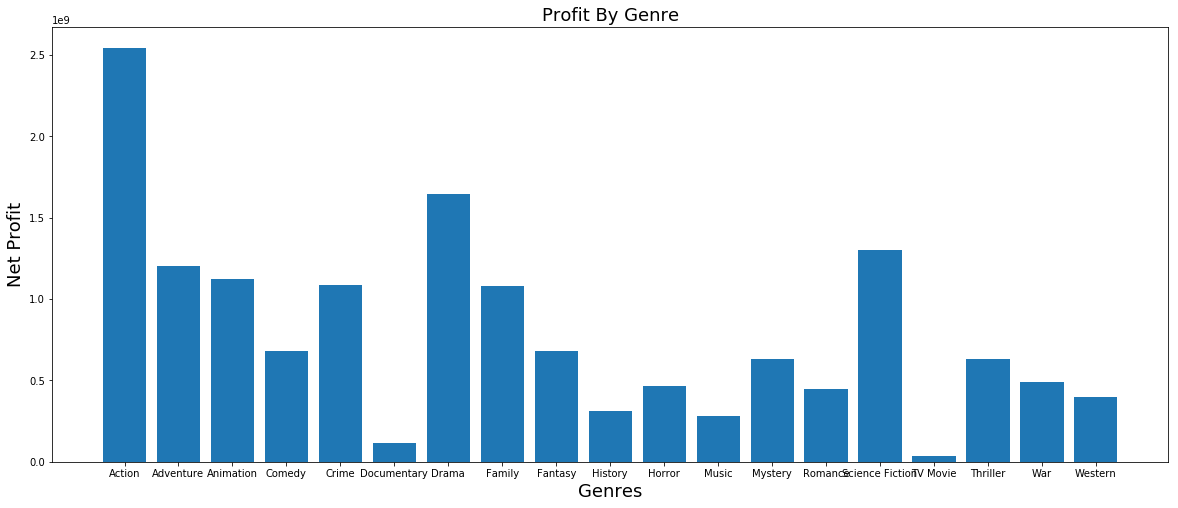

In [60]:
#To visualize our data
plt.subplots(figsize=(20,8))
plt.bar(genres_profits.index, genres_profits)
plt.title('Profit By Genre', fontsize=18)
plt.xlabel('Genres',fontsize=18)
plt.ylabel('Net Profit', fontsize=18);

#### Q8 Most Frequent movies are :

In [61]:
#here we can see most frequent movies are
Frequent_movie=Geners.value_counts(ascending=False)
Frequent_movie

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Music               29
Documentary         28
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

#### Q9  Which geners are popular ?

In [62]:
genres_popular = df.groupby(['genres'])['popularity'].max(ascending=False)
genres_popular
#here also action and adventure movies are the most popular ones

genres
Action             32
Adventure          24
Animation           6
Comedy              6
Crime               5
Documentary         1
Drama               8
Family              7
Fantasy             7
History             8
Horror              4
Music               3
Mystery             6
Romance             5
Science Fiction    10
TV Movie            0
Thriller            8
War                 6
Western             9
Name: popularity, dtype: int64

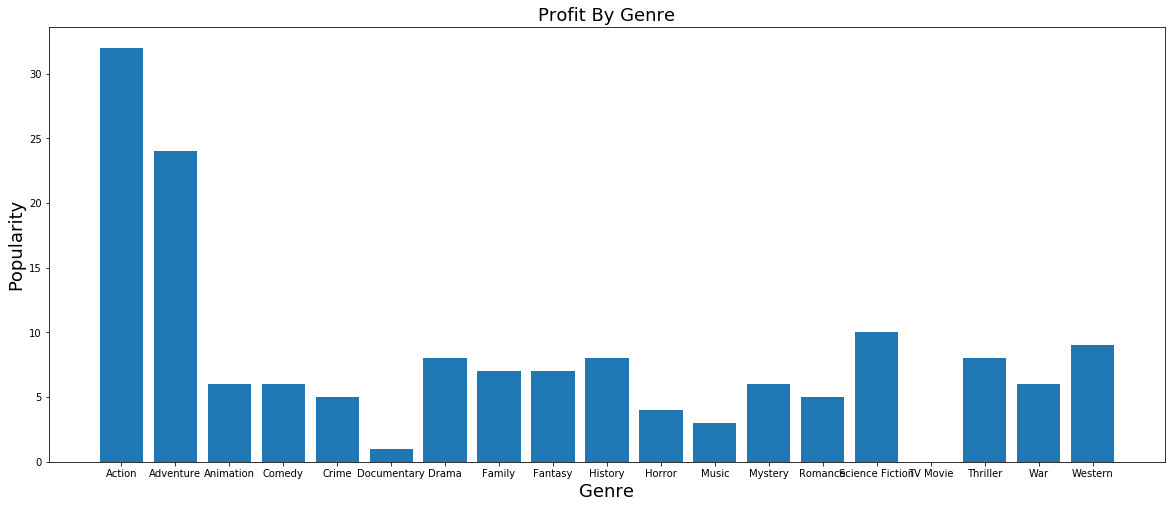

In [63]:
#to visualize our data
plt.subplots(figsize=(20,8))
plt.bar(genres_popular.index, genres_popular)
plt.title('Profit By Genre',fontsize=18)
plt.xlabel('Genre',fontsize=18)
plt.ylabel('Popularity',fontsize=18);

#### Q10  Average runtime of all the movies and does time has an effect on the revenue?.

In [64]:
#here i want to use this function to analyze movie time
def average(column):
    return df[column].mean()

In [65]:
time=average('runtime')
time
# as we can see here average movie time is 109 minutes

109.22883116883116

In [66]:
df['runtime'].describe()
#my observation here 25% of movies have runtime 90 minutes 

count    3850.000000
mean      109.228831
std        19.924053
min        15.000000
25%        95.250000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Text(0.5,1,'Effect Of Time On Revenue')

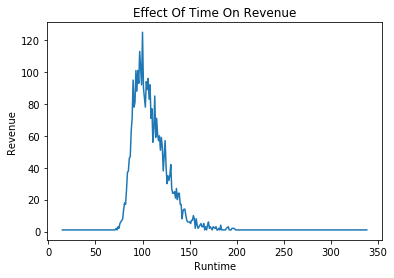

In [67]:
#To improve our time analysis we need to visualize it.
df.groupby(df['runtime']).count()['revenue'].plot()
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Effect Of Time On Revenue')

<a id='conclusions'></a>
## Conclusions
   After this analysis that i made , i find some interesting information that we can conclude following:

 In order for the movie to be sucessful, it should have the following aspects:
 
   1) Average duration of the movie should be around 109 minutes.
   
   2) Adventure,Action and Science fiction movies are the most  popular ones.
   
   3) Action, Drama and Adventure movies have the highest profit.
   
   4) Top frquent actors who can make sucessful movies are :
        Nicolas Cage             37
        Bruce Willis             32
        Johnny Depp              30
        Sylvester Stallone       29
        Robert De Niro           28
        Tom Hanks                28
        Denzel Washington        28
        Tom Cruise               27
   
   
In addition to there are some useful information about our data which are:

   * Most frequent movies are: Drama              890
                                Comedy             787
                                Action             689
                                Adventure          314
                                
   * 2015 is the most year that has the highest net profit.
   
   * Avatar movie has the highest profit in our data.
   
   * the worrier's way movie has the lowest profit in our data.
   
    



In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0